In [5]:
import sys
sys.path.append('../../numpy/1D')

from utils import *
from env import *
from model import *
from scipy.stats import ttest_ind

In [2]:
# set directory to folder with model trained with different place field parameter combinations
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/1D/"

In [ ]:
[latencys, cum_rewards] = saveload(data_dir+f'./comp_data/drift_perf_lat_cumr', 1, 'load')
print(cum_rewards.shape)
cr = np.mean(cum_rewards[:,1],axis=1)
print(cr.shape)

(4, 2, 3, 250000)
(4, 250000)


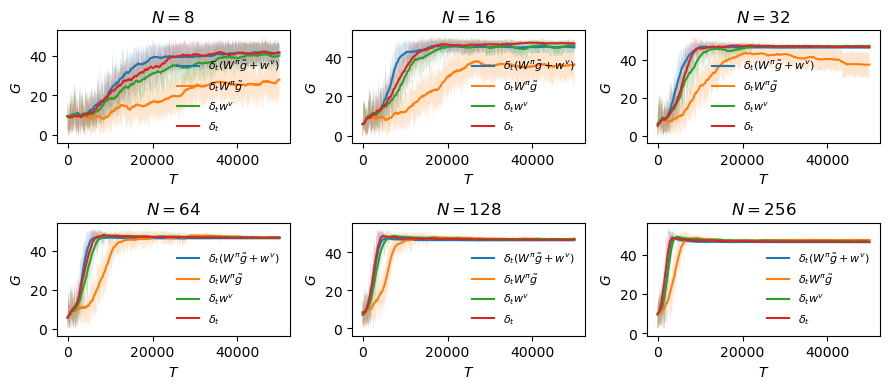

In [8]:

npcs = [8,16,32,64,128,256]
btypes = ['both','act','cri','none','actg']
names = [
    r'$\delta_t(W^\pi \tilde{g} + w^v)$',     # 'W^\pi \cdot \Tilde{g} + w^v'
    r'$\delta_t W^\pi \tilde{g}$',           # 'W^\pi \cdot \Tilde{g}'
    r'$\delta_t w^v$',                             # 'w^v'
    r'$\delta_t$',                        # '\delta_t'
    r'$\delta_t(W^\pi g + w^v)$'              # 'W^\pi \cdot g + w^v'
]
[cumr] = saveload(data_dir+'./comp_data/btype_091024', 1, 'load')

trials =np.arange(50000)[::100]

f,axs = plt.subplots(2,3, figsize=(9, 4))
axs = axs.flatten()
for n, npc in enumerate(npcs):
    for b, btype in enumerate(btypes):
        if b <4:
            meang = np.mean(cumr[b,n],axis=0)
            cig = 1.96 * np.std(cumr[b,n],axis=0)/np.sqrt(30)
            axs[n].plot(trials, moving_average(meang,20), label=names[b])
            axs[n].fill_between(trials, meang-cig, meang+cig, alpha=0.2)
    axs[n].set_title(f"$N={npc}$")
    axs[n].set_xlabel('$T$')
    axs[n].set_ylabel('$G$')
    axs[n].legend(fontsize=8, frameon=False)
    # axs[n].set_xscale('log')
f.tight_layout()
# f.savefig('./fig/btype_npc.svg')